In [3]:
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import xarray as xr
import glob

In this notebook I will be looking at the storm imprints during high storm and low storm years. I'm wondering if the imprints change much from one year to another?

In [39]:
ds = xr.open_dataset(f'/work/Katherine.Turner/tempest-extremes/odiv-251/comp_hfds/comp_hfds_anom.nc', use_cftime=True)

In [24]:
high_years_winter = [159, 182, 194, 198, 219, 229, 237]
low_years_winter = [175, 187, 205, 220, 221, 232, 238]

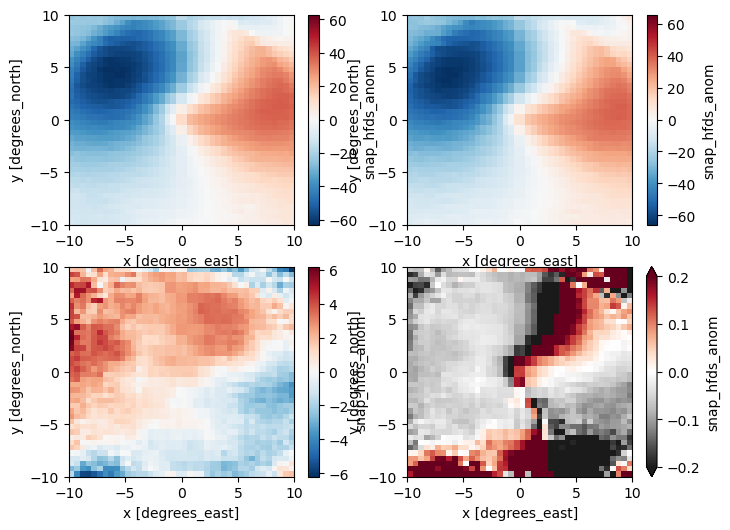

In [40]:
idx_high = ds.snap_time.dt.year.isin(high_years) & (ds.snap_time.dt.season == 'JJA')
idx_low = ds.snap_time.dt.year.isin(low_years) & (ds.snap_time.dt.season == 'JJA')

hi_comp = ds.snap_hfds_anom[idx_high,:,:].mean(dim='snapshot')
lo_comp = ds.snap_hfds_anom[idx_low,:,:].mean(dim='snapshot')

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8,6))

axs = axs.flatten()

hi_comp.plot(ax=axs[0], y='y')
lo_comp.plot(ax=axs[1], y='y')
(hi_comp - lo_comp).plot(ax=axs[2], y='y')
((hi_comp - lo_comp)/hi_comp).plot(ax=axs[3], y='y', vmin=-.2, vmax=.2, cmap="RdGy_r")

In [41]:
ds = xr.open_dataset(f'/work/Katherine.Turner/tempest-extremes/odiv-251/comp_dic_stf_gas/comp_dic_stf_gas_anom.nc', use_cftime=True)

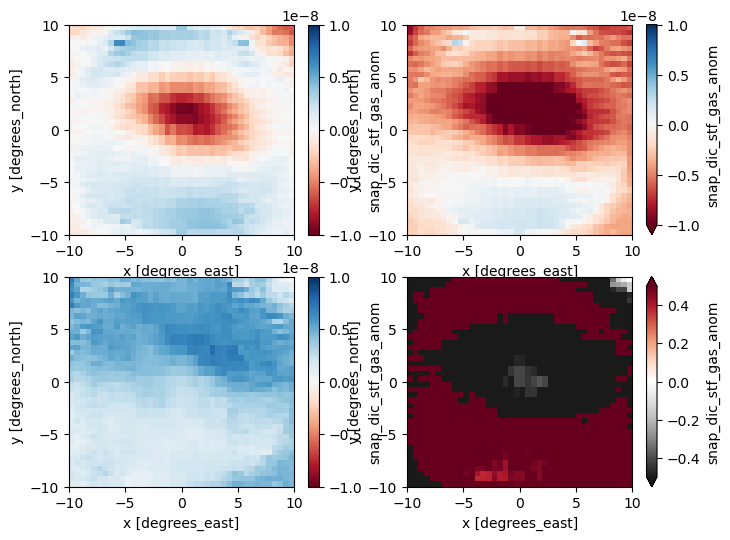

In [45]:
idx_high = ds.snap_time.dt.year.isin(high_years) & (ds.snap_time.dt.season == 'JJA')
idx_low = ds.snap_time.dt.year.isin(low_years) & (ds.snap_time.dt.season == 'JJA')

hi_comp = ds.snap_dic_stf_gas_anom[idx_high,:,:].mean(dim='snapshot')
lo_comp = ds.snap_dic_stf_gas_anom[idx_low,:,:].mean(dim='snapshot')

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8,6))

axs = axs.flatten()

hi_comp.plot(ax=axs[0], y='y', vmin=-1e-8, vmax=1e-8, cmap='RdBu')
lo_comp.plot(ax=axs[1], y='y', vmin=-1e-8, vmax=1e-8, cmap='RdBu')
(hi_comp - lo_comp).plot(ax=axs[2], y='y', vmin=-1e-8, vmax=1e-8, cmap='RdBu')
((hi_comp - lo_comp)/hi_comp).plot(ax=axs[3], y='y', vmin=-.5, vmax=.5, cmap="RdGy_r")

In [19]:
var_high = var_high.compute()
var_low = var_low.compute()

lat0h = var_high.argmax(dim=['lat', 'lon'])['lat']
lon0h = var_high.argmax(dim=['lat', 'lon'])['lon']

lat0l = var_low.argmax(dim=['lat', 'lon'])['lat']
lon0l = var_low.argmax(dim=['lat', 'lon'])['lon']

In [20]:
lat0h, lon0h

(<xarray.DataArray 'slp_bp_7d' ()>
 array(29),
 <xarray.DataArray 'slp_bp_7d' ()>
 array(36))

In [21]:
lat0l, lon0l

(<xarray.DataArray 'slp_bp_7d' ()>
 array(28),
 <xarray.DataArray 'slp_bp_7d' ()>
 array(31))